In [1]:
from heapq import merge

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

C:\Users\quinc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Voorbeeld van hoe je de functie kunt aanroepen
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240701_20240707_monaco/20240705_endurance/0197 - 20240705T112922 4h42m28s 12.770km Monte-Carlo - Saint-Roman - Monte-Carlo"
result = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [3]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result:
    merged_df = result['merged_df']
    # Gebruik merged_df zoals je wilt
    display(merged_df.head())
else:
    print("De data is nog niet geladen.")


,Datalogger port_x,"Dataloggertijd, in s_x",Tijd sinds boot in seconden,tijd,Datum_x,Cel spanning van cel 1,Cel spanning van cel 2,Cel spanning van cel 3,Cel spanning van cel 4,Cel spanning van cel 5,...,Board Temperature,Format header (>08|05),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Magnetische directie,Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.5,08|05,092923.000,A,4344.2300,N,00725.6064,E,None,D
0 days 00:00:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092924.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092925.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092926.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092927.000,A,4344.2300,N,00725.6066,E,None,D


In [4]:
# Convert 'Latitude' and 'Longitude' to numeric, setting errors='coerce' to convert non-numeric values to NaN
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')
merged_df['Snelheid over de grond in km/h'] = pd.to_numeric(merged_df['Snelheid over de grond in km/h'], errors='coerce')
merged_df['Discharge 1 stroom'] = pd.to_numeric(merged_df['Discharge 1 stroom'], errors='coerce')
merged_df['Discharge 1 spanning'] = pd.to_numeric(merged_df['Discharge 1 spanning'], errors='coerce')

# Filter out rows where 'Latitude' or 'Longitude' is NaN
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Filter rows where 'Latitude' is between 4300 and 4400 and 'Longitude' is between 700 and 800
filtered_df = merged_df[(merged_df['Latitude'] >= 4300) &
                        (merged_df['Latitude'] <= 4400) &
                        (merged_df['Longitude'] >= 700) &
                        (merged_df['Longitude'] <= 800) &
                        (merged_df['Snelheid over de grond in km/h'] >= 0) &
                        (merged_df['Snelheid over de grond in km/h'] <= 50)]
filtered_df

,Datalogger port_x,"Dataloggertijd, in s_x",Tijd sinds boot in seconden,tijd,Datum_x,Cel spanning van cel 1,Cel spanning van cel 2,Cel spanning van cel 3,Cel spanning van cel 4,Cel spanning van cel 5,...,Board Temperature,Format header (>08|05),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Magnetische directie,Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.5,08|05,092923.000,A,4344.2300,N,725.6064,E,None,D
0 days 00:00:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092924.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092925.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092926.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4,08|05,092927.000,A,4344.2300,N,725.6066,E,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,8.0,16991.957050,17001.0825,160351.625,240705.0,3.259500,3.279625,3.282000,3.265375,3.277625,...,43.2,08|05,141146.000,A,4344.3610,N,725.9590,E,None,A
0 days 04:43:13,8.0,16992.956862,17002.0825,160352.625,240705.0,3.259750,3.279375,3.281875,3.265125,3.277750,...,43.2,08|05,141147.000,A,4344.3595,N,725.9564,E,None,A
0 days 04:43:14,8.0,16993.956837,17003.0825,160353.625,240705.0,3.260875,3.280375,3.282625,3.266250,3.278500,...,43.2,08|05,141148.000,A,4344.3583,N,725.9535,E,None,A


In [7]:
# x_as, y_as, z_as = lib.variable_selector(filtered_df)
# print(x_as, y_as)

In [9]:
x_as = 'Latitude'
y_as = 'Longitude'
z_as = 'None'

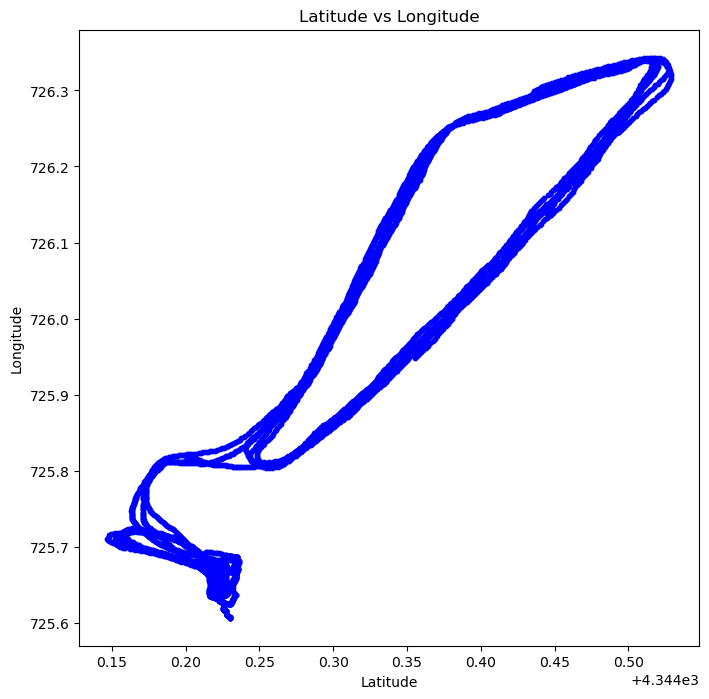

In [10]:
lib.plot_data(filtered_df, x_as, y_as)

In [10]:
lib.plot_window_gui(filtered_df)

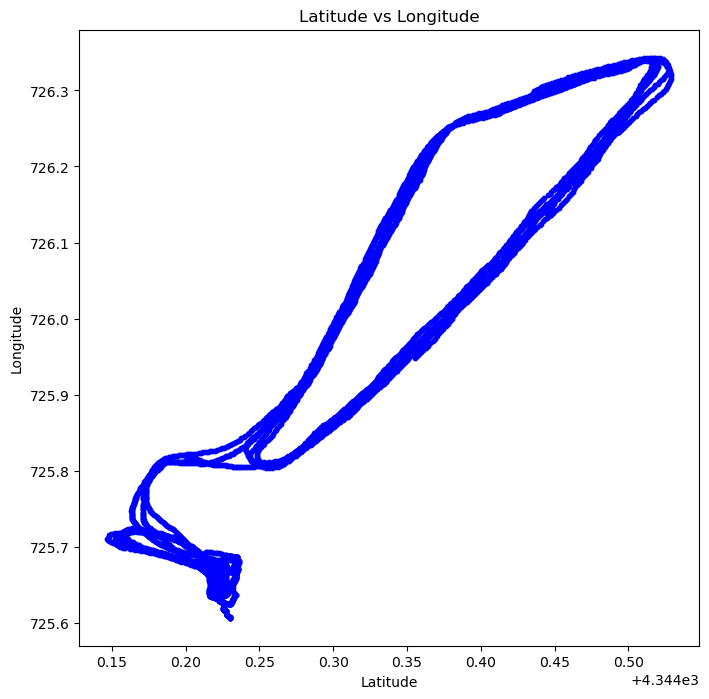

In [12]:
lib.plot_data(filtered_df, x_as, y_as)